In [1]:
from fastai import *
from fastai.vision import *
from torchvision.models import vgg16_bn

In [2]:
path = Path('./data/crappified/dataset_1/')
path_hr = path/'orig_spectr'

In [3]:
meta_spectr= pd.read_csv('./data/crappified/dataset_1/meta/meta_spectr.csv')
meta_spectr.subset = meta_spectr.subset == 'valid'

In [4]:
data = ImageList.from_df(meta_spectr, './data/crappified/dataset_1/orig_spectr/').split_from_df('subset').label_from_df('genre').databunch(bs=128)

In [5]:
data

ImageDataBunch;

Train: LabelList (527073 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop
Path: data/crappified/dataset_1/orig_spectr;

Valid: LabelList (130750 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop
Path: data/crappified/dataset_1/orig_spectr;

Test: None

In [5]:
# data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(9,9))

In [14]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


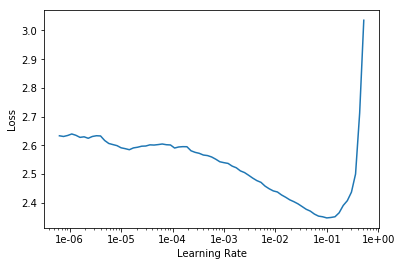

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
learn.load('model1')

Learner(data=ImageDataBunch;

Train: LabelList (527073 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop
Path: data/crappified/dataset_1/orig_spectr;

Valid: LabelList (130750 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop
Path: data/crappified/dataset_1/orig_spectr;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [15]:
learn.fit_one_cycle(max_lr=1e-02, cyc_len=30)

epoch,train_loss,valid_loss,accuracy,time
0,1.428673,1.476208,0.472382,06:27
1,1.343978,1.449233,0.485881,06:58
2,1.346544,1.455655,0.480314,07:04
3,1.334090,1.565722,0.427067,07:09
4,1.362666,1.495436,0.468566,07:10
5,1.369105,1.585509,0.437163,07:07
6,1.378283,1.703850,0.380704,07:10
7,1.416250,1.520623,0.458218,07:09
8,1.373927,1.447214,0.488390,07:08
9,1.386026,1.470055,0.475006,07:06


In [13]:
learn.save('model2')